In [16]:
'''
Archivo en GitHub:

https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb

'''

'\nArchivo en GitHub:\n\nhttps://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb\n\n'

# Pregunta 1
Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

Transforme a factor las variables categóricas.
Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).
Transforme la variable humedad a porcentaje (multiplique la variable por 100).
Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [17]:
# Importar pandas
import pandas as pd

In [18]:
# Cargar base de datos bike.csv en la variable data_bikes
data_bikes = pd.read_csv('data/bikes.csv')

In [19]:
print('Shape')
data_bikes.shape

Shape


(731, 14)

In [20]:
# Análisis iniciales del df
print('__________')
print('Info')
data_bikes.info()

__________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  registered  731 non-null    int64  
 13  Target      731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [21]:
# Transforme a factor las variables categóricas.
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for var in categorical_vars:
    data_bikes[var] = data_bikes[var].astype('category')


In [22]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        731 non-null    object  
 1   season      731 non-null    category
 2   year        731 non-null    category
 3   month       731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    category
 7   weather     731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  humidity    731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  registered  731 non-null    int64   
 13  Target      731 non-null    int64   
dtypes: category(7), float64(4), int64(2), object(1)
memory usage: 46.5+ KB


In [23]:
# Cambiar a fecha variable 'date' a formato datetime año-mes-día
data_bikes['date'] = pd.to_datetime(data_bikes['date'], format='%Y-%m-%d')

In [24]:
# Nuevo info con data como fecha
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  Target      731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 46.5 KB


In [25]:
# Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada
data_bikes['temp'] = 47 * data_bikes['temp'] -8 #Transformación temperatura
data_bikes['atemp'] = 66 * data_bikes['atemp'] -16 #Transformación sensación térmica

In [26]:
# Transforme la variable humedad a porcentaje (multiplique la variable por 100)
data_bikes['humidity'] = data_bikes['humidity'] * 100

In [27]:
# Transforme la velocidad del viento a millas por hora 
# (multiplique por 67 el valor de la variable normalizada)
data_bikes['windspeed'] = data_bikes['windspeed'] * 67

# Pregunta 2
Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

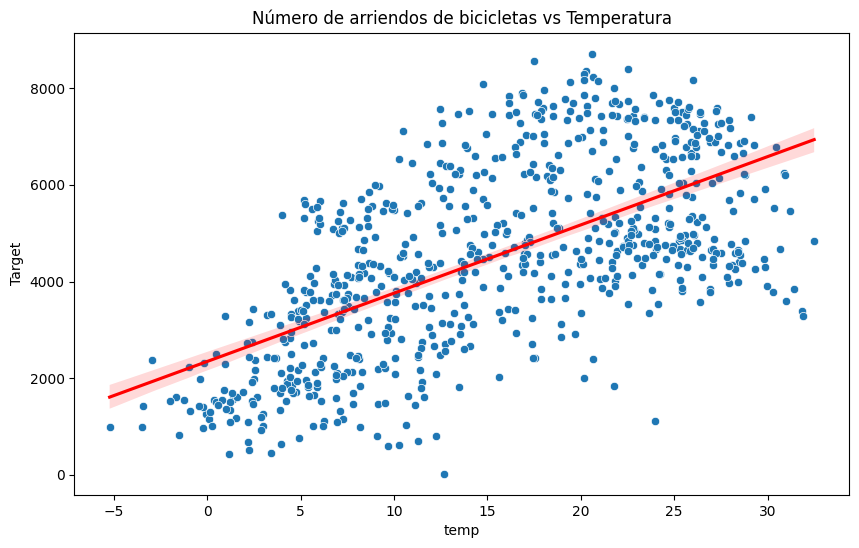

In [29]:
# Realizar el gráfico según las instrucciones 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_bikes, x='temp', y='Target')
sns.regplot(data=data_bikes, x='temp', y='Target', scatter=False, color='red')  # Curva de regresión lineal
plt.title("Número de arriendos de bicicletas vs Temperatura")
plt.show()

### ¿Cuál es la relación entre el número de arriendos con la temperatura? ###
Al aumentar la temperatura, también aumenta la cantidad de arriendos. La curva de regresión lineal demuestra que existe esa tendencia entre el aumento de temperatura y arriendos de bicicletas. Encontrando una mayor incertidumbre en los extremos de menor o mayor temperatura, lo que parece creíble ante la experiencia que con menos de 5 grados o más de 30 las personas pueden tener menos ganas de salir a andar en bicicleta 

# Pregunta 3
¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años?, realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.

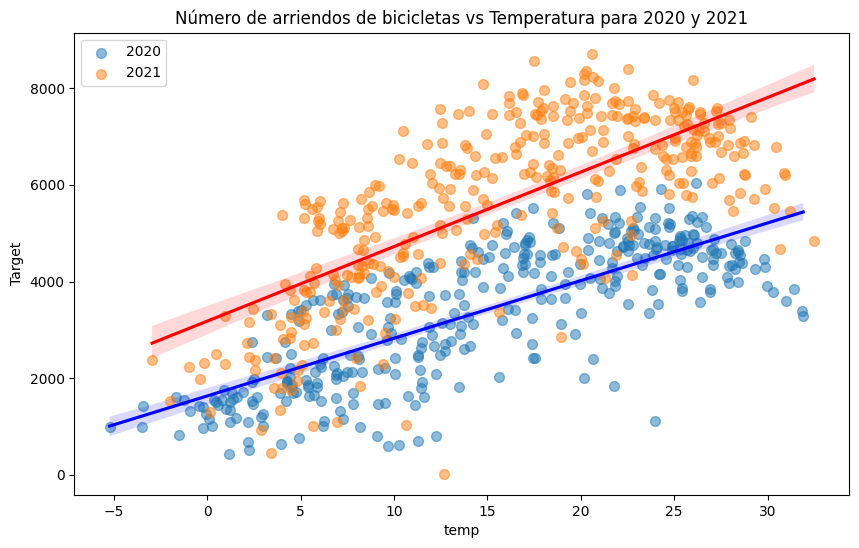

In [30]:
plt.figure(figsize=(10, 6))

# Gráfica para el año 2020
sns.regplot(data=data_bikes[data_bikes['year'] == 0], x='temp', y='Target', label='2020', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'})

# Gráfica para el año 2021
sns.regplot(data=data_bikes[data_bikes['year'] == 1], x='temp', y='Target', label='2021', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'}, scatter=True)

plt.title("Número de arriendos de bicicletas vs Temperatura para 2020 y 2021")
plt.legend()
plt.show()

In [31]:
import statsmodels.api as sm

# Separar los datos por año
data_2020 = data_bikes[data_bikes['year'] == 0]
data_2021 = data_bikes[data_bikes['year'] == 1]

# Ajustar la regresión lineal para 2020
X_2020 = sm.add_constant(data_2020['temp'])  # Añadir una constante para el término de intercepción
model_2020 = sm.OLS(data_2020['Target'], X_2020).fit()

# Ajustar la regresión lineal para 2021
X_2021 = sm.add_constant(data_2021['temp'])
model_2021 = sm.OLS(data_2021['Target'], X_2021).fit()

# Imprimir los coeficientes (pendientes) para cada año
print("Coeficiente (pendiente) para 2020:", model_2020.params['temp'])
print("Coeficiente (pendiente) para 2021:", model_2021.params['temp'])


Coeficiente (pendiente) para 2020: 119.32616881805956
Coeficiente (pendiente) para 2021: 154.246382971884


### ¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años? ###
Existe una relación similar en la relación entre el aumento de la temperatura con el de las bicicletas: a mayor temperatura, mayor cantidad de arriendos.
Pero el año 2021 por cada grado celsius de aumento, la cantidad de arriendos es mayor que el 2020, esto lo podemos encontrar por sus pendientes: 

> Coeficiente (pendiente) para 2020: 119.32616881805956

> Coeficiente (pendiente) para 2021: 154.246382971884

Esto indica que aunque la tendencia es al alza en ambos años, el 2021 es mayor

# Pregunta 4
Por selección forward, construya un modelo sin considerar las variables

date
month
registered
Interpreta el factor asociado a la Temperatura y días feriados.

In [32]:
# Primero, necesitamos descartar las variables (date, month, registered)
data_bikes = data_bikes.drop(columns=['date', 'month', 'registered'])

In [33]:
# Variables disponibles para el modelo
variables = data_bikes.columns.tolist()
target = 'Target'
variables.remove(target)

selected_variables = []  # Aquí almacenamos las variables seleccionadas
best_score = 1e20  # Inicializamos el score con un valor alto

for i in range(len(variables)):
    scores_with_candidates = []
    for candidate in variables:
        if candidate not in selected_variables:
            # Ajustamos el modelo con la variable candidata
            X = sm.add_constant(data_bikes[selected_variables + [candidate]])
            y = data_bikes[target]
            model = sm.OLS(y, X).fit()
            rss = ((model.predict(X) - y) ** 2).sum()
            scores_with_candidates.append((rss, candidate))
    scores_with_candidates.sort()
    if scores_with_candidates[0][0] < best_score:
        best_score = scores_with_candidates[0][0]
        selected_variables.append(scores_with_candidates[0][1])

final_model = sm.OLS(data_bikes[target], sm.add_constant(data_bikes[selected_variables])).fit()


In [34]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     285.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.98e-243
Time:                        18:38:54   Log-Likelihood:                -5983.6
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     720   BIC:                         1.204e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2704.2717    237.799     11.372      0.0

### Interpreta el factor asociado a la Temperatura y días feriados ###
Seguimos manteniendo la tendencia de relación entre el aumento de la temperatura y el arriendo de bicicletas. La relación es de 42.8632 
Pero el p-valor de 0.153 no nos permite refutar la hipótesis nula

Respecto a los días feriados, el coef nos muestra que los días feriados tenemos 539.9414 menos arriendos que en días no feriados. Al tener un p-valor de 0.008 podemos afirmar que esto es lo suficientemente confiable, por lo tanto, estadísticamente significativo. 

# Pregunta 5
Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

Normalidad.
Independencia
Igualdad de varianzas (homocedasticidad)
¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

In [35]:
import scipy.stats as stats

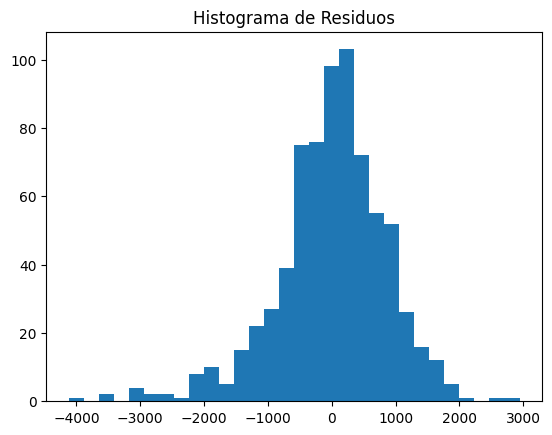

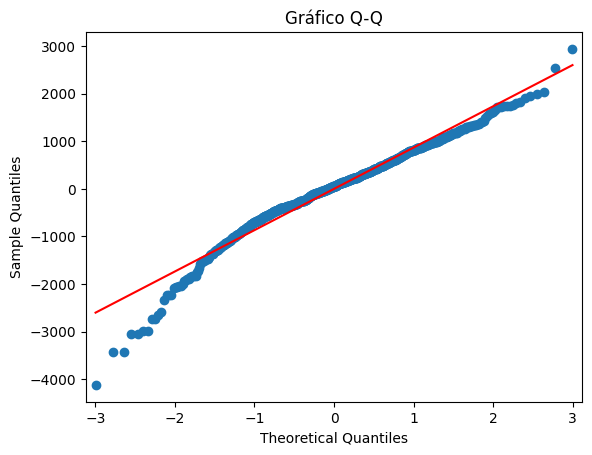

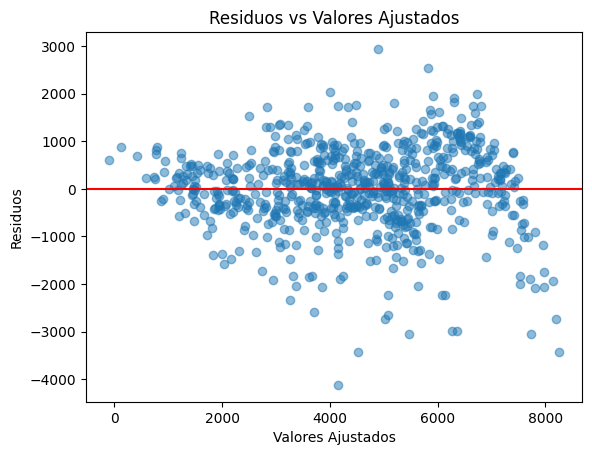

In [36]:
# Usando final_model como nombre del modelo
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues

# Histograma de residuos
plt.hist(residuos, bins=30)
plt.title("Histograma de Residuos")
plt.show()

# Gráfico Q-Q
sm.qqplot(residuos, line='s')
plt.title("Gráfico Q-Q")
plt.show()

# Residuos vs. Valores Ajustados
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [37]:
from scipy.stats import kstest

# Residuos en la variable con el mismo nombre 
residuos_estandarizados = (residuos - residuos.mean()) / residuos.std()

# Aplicar KS test
resultado = kstest(residuos_estandarizados, 'norm')

display(resultado)


KstestResult(statistic=0.0699010360384979, pvalue=0.0014994213055342896, statistic_location=-0.5410073995637165, statistic_sign=-1)

In [38]:
resultado.pvalue < 0.05

True

In [39]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Modelo ajustado con el nombre final_model
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues
variables_independientes = final_model.model.exog  # Esto recoge las variables independientes del modelo 

bp_test = het_breuschpagan(residuos, variables_independientes)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

print(result)


{'LM Statistic': 70.93255402979439, 'LM-Test p-value': 2.928024524144319e-11, 'F-Statistic': 7.737306121253142, 'F-Test p-value': 7.801243778290048e-12}


### ¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones ###

A continuación compartimos los resultados de las pruebas
1. **Normalidad**:

Kolmogorov-Smirnov Test Result:
> `statistic=0.0699010360384979`

> `pvalue=0.0014994213055342896`

Interpretación:
Dado que el p-valor es significativo (0.0015 < 0.05), rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1).

Decisión:
Los residuos **no siguen una distribución normal**.

2. **Homocedasticidad**:

Breusch-Pagan Test Result:
> `LM-Test p-value: 2.928024524144319e-11`

Interpretación:
Un p-valor muy pequeño (mucho menos de 0.05) sugiere que rechazamos la hipótesis nula (H0) en favor de la hipótesis alternativa (H1).

Decisión:
Los residuos presentan **heterocedasticidad**.

3. **Autocorrelación**:

Durbin-Watson statistic:
> `0.953` 

Interpretación:
Valores cercanos a 2 indican que no hay autocorrelación en los residuos. El valor 0.953, es menor a 2, lo que sugiere la presencia de autocorrelación positiva.

Decisión:
Los residuos están **correlacionados** (indicando que hay autocorrelación).

## Resumen:
> Los residuos **no son normales**.

> Los residuos presentan **heterocedasticidad**.

> Hay evidencia de **autocorrelación** en los residuos.



# Pregunta 6
Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades:
```python

import pandas as pd
pd.DataFrame({'season' : 2,
       'year' : 2021,
       'holiday' : 'feriado',
       'weekday' : 'Sábado',
       'workingday' : 'No laboral',
       'weather' : 'Niebla',
       'temp' : 12,
       'atemp' : 11,
       'humidity' : 66.3,
       'windspeed' : 12.5}, index = ['1'])

```


In [40]:
input_data = pd.DataFrame({
    'const': 1,
    'season': 2,
    'year': 1, # 2021
    'holiday': 1, # feriado
    'weekday': 6, # Sábado
    'workingday': 0, # No laboral
    'weather': 2, # Niebla
    'temp': 12,
    'atemp': 11,
    'humidity': 66.3,
    'windspeed': 12.5
}, index=[1])

prediction = final_model.predict(input_data)
print("Predicción de arriendos de bicicletas:", prediction[1])



Predicción de arriendos de bicicletas: 4136.596620165274


### Predicción ###
Predicción de arriendos de bicicletas: 4136.596620165274

# Pregunta 7
Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023)

In [41]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Carga la base de datos Lluvia_full.csv
df = pd.read_csv('data/Lluvia_full.csv')

# Codifica la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente
df = df.replace({'LluviaMan': {'No': 0, 'Yes': 1}})
df['LluviaMan'] = df['LluviaMan'].astype('int8')

# Separa la base de datos en un set de entrenamiento y set de validación
# Utilicé una proporción de 80:20 respectivamente
random.seed(2023)
indices = np.random.permutation(df.index)
train_idx = indices[:int(0.8*len(df))]
val_idx = indices[int(0.8*len(df)):]

X_train = df.iloc[train_idx].drop('LluviaMan', axis=1)
y_train = df.iloc[train_idx]['LluviaMan']
X_val = df.iloc[val_idx].drop('LluviaMan', axis=1)
y_val = df.iloc[val_idx]['LluviaMan']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int8   
 18  Koppen       56420 non-null  object 
 19  Esta

In [45]:
# 8
from sklearn.linear_model import LogisticRegression



# Selecciona la variable Evaporación
X = df['Evaporacion']
y = df['LluviaMan']

# Crea una serie de Pandas
df = pd.Series([3.4, 3.4, 2.8, ...])

# Convierte la serie en un array de NumPy
X = df.to_numpy()

# Convierte el array de NumPy en una matriz de dos dimensiones
X = X.reshape(-1, 1)

# Entrena el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Imprime la importancia de las variables
print(model.coef_)

# Imprime el odd ratio de la evaporación
print(np.exp(model.coef_[0]))


KeyError: 'Evaporacion'

In [46]:
df = df.replace({'LluviaHoy': {'No': 0, 'Yes': 1}})
df = df.replace({'Koppen': {'Temperate': 0, 'Subtropical': 1, 'Grassland': 2, 'Tropical': 3, 'Desert': 4}})
df = df.replace({'Estacion': {'Invierno': 0, 'Otoño': 1, 'Verano': 2, 'Primavera': 3}})

AttributeError: 'Series' object has no attribute '_replace_columnwise'

In [ ]:
# 9

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



# Selecciona las variables predictoras
X = df.drop('LluviaMan', axis=1)
y = df['LluviaMan']

# Crea un modelo de regresión logística
model = LogisticRegression()

# Utiliza RFE para seleccionar las variables más importantes
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Obtén las variables seleccionadas
selected_features = rfe.support_

# Entrena el modelo con las variables seleccionadas
model.fit(X[selected_features], y)

# Imprime la importancia de las variables
print(model.coef_)

# Imprime el odd ratio de las variables seleccionadas
for i, feature in enumerate(selected_features):
    print(feature, np.exp(model.coef_[i]))


/Users/davidlealolivares/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/davidlealolivares/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

ValueError: Item wrong length 19 instead of 56420.